In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf




In [2]:
df = pd.read_csv('../data/framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
df = df[['age', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
df.dropna(axis=0,inplace=True)
df


C:\Users\MSI\AppData\Local\Temp\ipykernel_3948\4255273023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)


,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,BMI,heartRate,glucose,TenYearCHD
0,39,0,0,0,0,26.97,80.0,77.0,0
1,46,0,0,0,0,28.73,95.0,76.0,0
2,48,1,0,0,0,25.34,75.0,70.0,0
3,61,1,0,1,0,28.58,65.0,103.0,1
4,46,1,0,0,0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...
4234,51,1,0,0,0,19.71,65.0,68.0,0
4235,48,1,0,0,0,22.00,84.0,86.0,0
4237,52,0,0,0,0,21.47,80.0,107.0,0
4238,40,0,0,1,0,25.60,67.0,72.0,0


In [4]:
x = df.drop(['TenYearCHD'],axis=1)
y = np.asanyarray(df['TenYearCHD'])

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

C:\Users\MSI\AppData\Local\Temp\ipykernel_3948\3682493324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'TenYearCHD', data = df , palette='BuGn_r' )


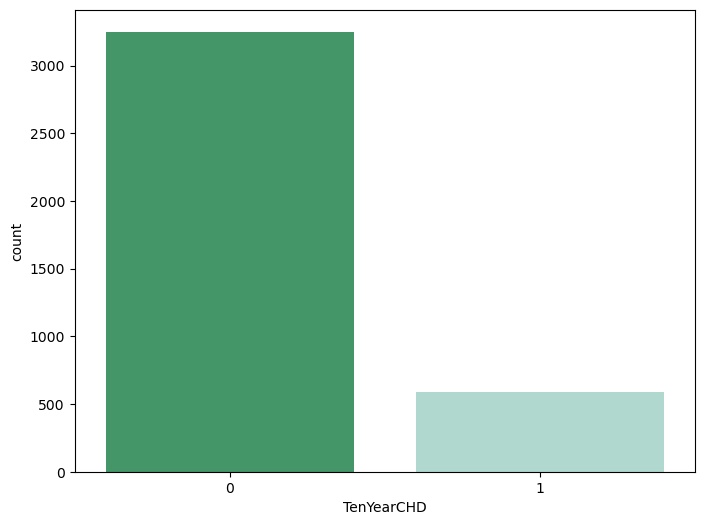

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'TenYearCHD', data = df , palette='BuGn_r' )
plt.show()

In [ ]:

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)  
x_test = scaler.transform(x_test)  

model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=32, epochs=200, validation_data=(x_test, y_test))

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7950 - loss: 12.7281 - val_accuracy: 0.8490 - val_loss: 10.2446
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


accuracy :  0.8489583333333334


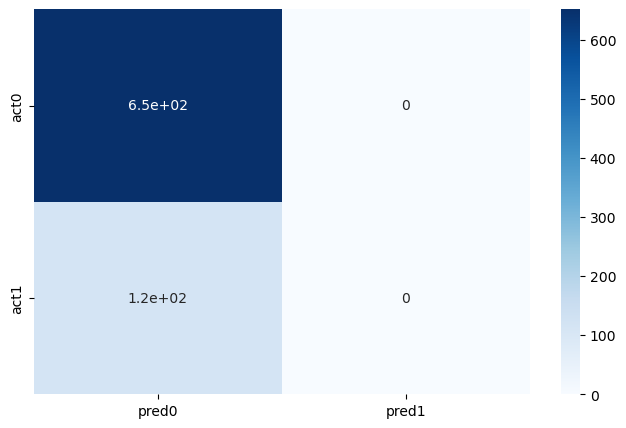

the detail for confus = 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       652
           1       0.00      0.00      0.00       116

    accuracy                           0.85       768
   macro avg       0.42      0.50      0.46       768
weighted avg       0.72      0.85      0.78       768



d:\apps\ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\apps\ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\apps\ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
from sklearn.metrics import accuracy_score
print("accuracy : ",accuracy_score(y_test,y_pred))
from sklearn.metrics import confusion_matrix ,classification_report
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data =cm , 
                        columns=['pred0','pred1'],
                        index=['act0','act1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.show()
print('the detail for confus = ')
print(classification_report(y_test,y_pred))